# Gradient Descent

    Optimizating technique to find optimal solutions for various ML algorithms
    
    The general idea of Gradient Descent is to tweak parameters iteratively in 
    order to minimize a cost function

$$\hat y = H_{\theta}(X) = \theta^T X$$

$$ MSE(\theta) = \frac {1} {N} \sum \limits_{i=1}^N {(\theta^TX^{(i)} - y^{(i)})}^2$$

### The goal of gradient descent algorithm is to minimize this cost function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bias = np.random.normal(10, 3, 1000) # theta_0 => 10
coef = 0.35 # theta_1 => 0.35

height = np.random.normal(170, 30, 1000)


weight = bias + coef * height

print('Actual Bias ', bias.mean())
print('Actual Coef ', coef)

Actual Bias  9.888293809012024
Actual Coef  0.35


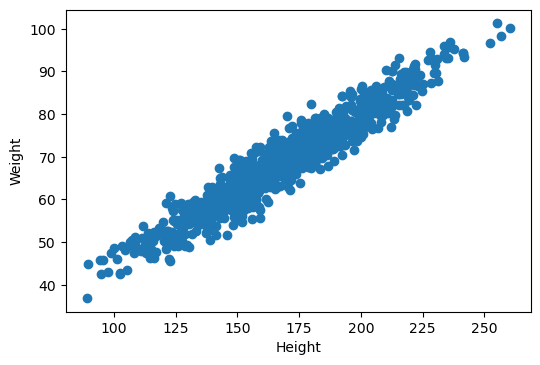

In [3]:
plt.figure(dpi=100)
plt.scatter(height, weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### Gradient Descent Algorithm

step1: Initlize Random Values for parameters $\theta$

In [5]:
def mse(y, y_hat):
    return ((y-y_hat)**2).sum() / len(y)

def rmse(y, y_hat):
    return np.sqrt(mse(y, y_hat))

In [10]:
def show_fig(y_pred):
    plt.figure(dpi=100)
    plt.scatter(height, weight, label='actual')
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.plot(height, y_pred, color='r', lw=2, label='prediction')
    plt.show()
    
def h(X, t0, t1):
    return t0 + t1*X

In [11]:
np.random.seed(123) # random_state

1.1941327659912941 0.7379954057320357
Error:  3425.209627708864


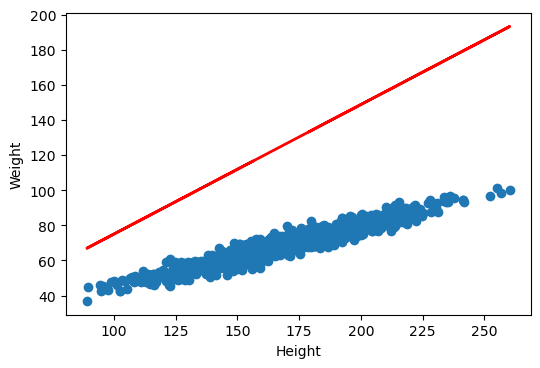

In [19]:
# step-1 Initlize Random Values for parameters
t0 = np.random.random()*3
t1 = np.random.random()
print(t0, t1)

y_pred = t0 + t1 * height

print("Error: ", mse(weight, y_pred))

show_fig(y_pred)

thetas = [ (t0, t1)] 

error = [ mse(weight, y_pred) ] 

step2: to calculate gradient of your cost function (mean squared error)
 by partially derriving cost function with respect each parameter 
 
 
 graident will give us slope sharpness (direction), so that we can descent to minimize the error

$$\nabla_{\theta_j} MSE\theta = \frac {\sum\limits_{i=1}^N \left(\hat y^{(i)} - y^{(i)}) {X_{j}}^{(i)} \right)} {N} $$

In [26]:
eta = 0.0000001 # learning Rate

In [20]:
y_pred = t0 + t1 * height

grad_t0 = ( (y_pred - weight) ).sum() / len(weight)
print(grad_t0)
grad_t1 = ( (y_pred - weight) * height ).sum() / len(weight)
print(grad_t1)

57.38620250462332
10093.879470743734


step3:  updation rule

$\theta_{next} = \theta_{prev} - \nabla_{\theta} MSE(\theta)$

In [27]:
print(t0)
print(t1)

1.1941327659912941
0.7379954057320357


1.193558903966248
0.6370566110245983


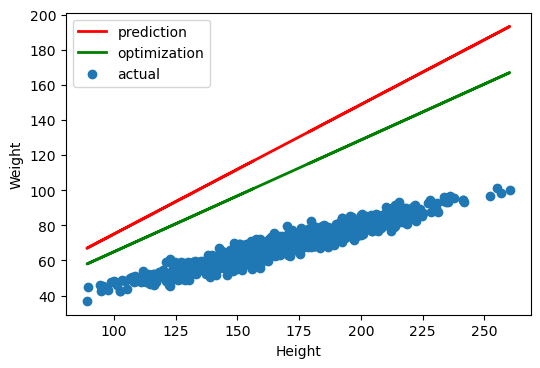

In [32]:
eta = 0.00001
t0_next = t0 - eta * grad_t0
print(t0_next)
t1_next = t1 - eta * grad_t1
print(t1_next)

plt.figure(dpi=100)
plt.scatter(height, weight, label='actual')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.plot(height, y_pred, color='r', lw=2, label='prediction')

new_pred = t0_next + t1_next * height

plt.plot(height, new_pred, color='g', lw=2, label='optimization')
plt.legend()
plt.show()

In [35]:
y_pred = t0 + t1 * height
np = t0_next + t1_next * height

grad_t0 = ( (np - weight) ).sum() / len(weight)
print(grad_t0)
grad_t1 = ( (np - weight) * height ).sum() / len(weight)
print(grad_t1)

28.13373490256993
4967.892901349777


1.1938514286422683
0.6883164767185379


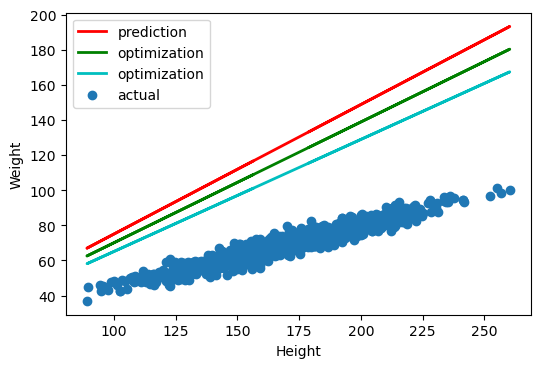

In [36]:

eta = 0.00001
t0_next = t0 - eta * grad_t0
print(t0_next)
t1_next = t1 - eta * grad_t1
print(t1_next)

plt.figure(dpi=100)
plt.scatter(height, weight, label='actual')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.plot(height, y_pred, color='r', lw=2, label='prediction')

new_pred = t0_next + t1_next * height

plt.plot(height, new_pred, color='g', lw=2, label='optimization')

t0_next = t0_next - eta * grad_t0
t1_next = t1_next - eta * grad_t1


new_pred = t0_next + t1_next * height

plt.plot(height, new_pred, color='c', lw=2, label='optimization')
plt.legend()
plt.show()

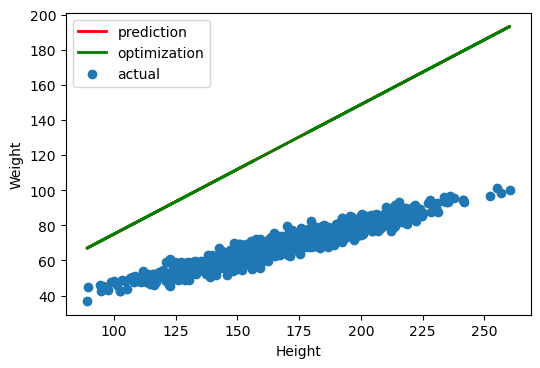

In [38]:
import numpy as np

Error:  1572.7637451992846
Error:  870.1906750630881
Error:  483.76029518903016
Error:  271.2152305097241
Error:  154.31084888813996
Error:  90.01091086493443
Error:  54.64455421969169
Error:  35.1922929262941
Error:  24.493128166617954
Error:  18.608355757542036


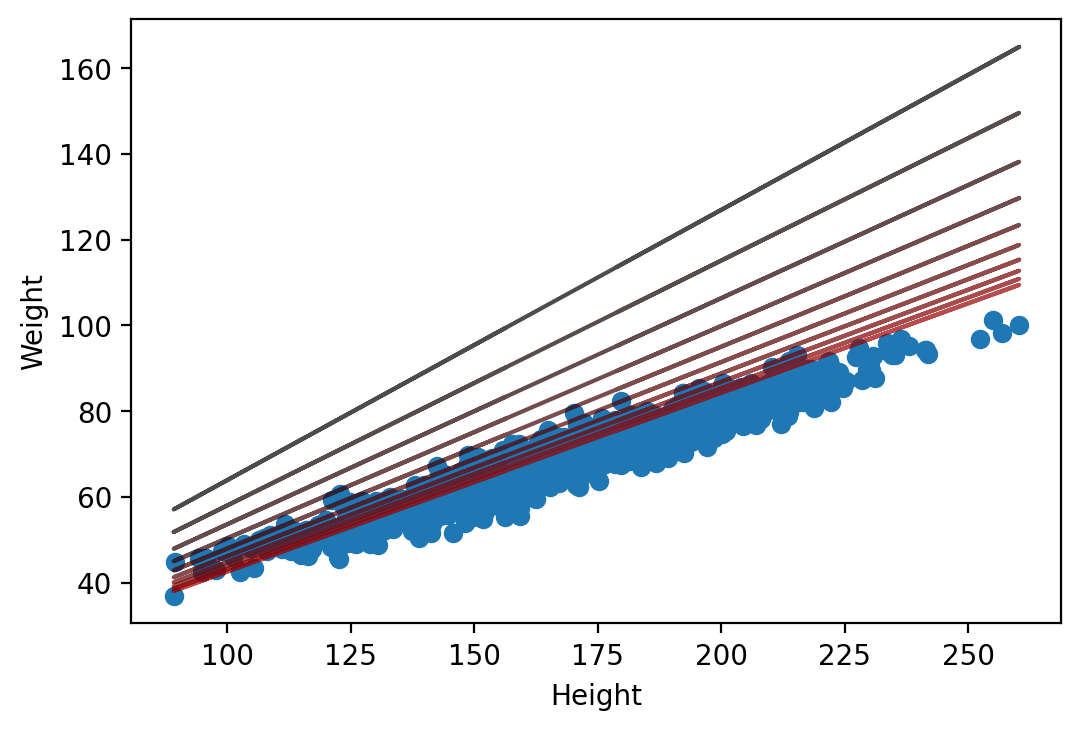

In [45]:
eta = 0.0000001 # why ? 
n_iter = 1000

t0 = np.random.random()*3 # random initlization
t1 = np.random.random() # random initliztion

y_pred = t0 + t1 * height # intial prediction

plt.figure(dpi=200)
plt.scatter(height, weight, label='actual')
plt.xlabel('Height')
plt.ylabel('Weight')

c = 0
for i in range(n_iter):
    grad_t0 = ( (y_pred - weight) ).sum() / len(weight)
    grad_t1 = ( (y_pred - weight) * height ).sum() / len(weight)
    t0 = t0 - eta * grad_t0
    t1 = t1 - eta * grad_t1
    y_pred = t0 + t1 * height
    if i % (n_iter//10) == 0 :
        color = f"#{c}{c}0000"
        c = c + 1
        print("Error: ", mse(weight, y_pred))
        plt.plot(height, y_pred, label=i, alpha=0.7, color=color)

plt.show()
        
    
#show_fig(pred)

In [46]:
from sklearn.linear_model import SGDRegressor


In [47]:
height.mean()

170.3122319785447

In [48]:
X = height.reshape(-1, 1)
X[:5]

array([[156.16747583],
       [100.08079826],
       [188.8166536 ],
       [128.74776478],
       [128.33243558]])

In [49]:
y = weight

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scale = StandardScaler()
Xs = scale.fit_transform(X)
Xs[:5]

array([[-0.48861363],
       [-2.42606062],
       [ 0.63921305],
       [-1.43579465],
       [-1.4501417 ]])

In [70]:
model = SGDRegressor(eta0=0.001, max_iter=1000, tol=0.0001, early_stopping=True)
# whenever we create a model we need to pass hyper parameters

In [54]:
model.fit(Xs, y)

SGDRegressor(early_stopping=True, tol=0.01)

In [55]:
model.coef_ # 

array([10.30523735])

In [56]:
model.intercept_

array([69.53578319])

In [57]:
y_hat = model.predict(Xs)

In [58]:
from sklearn.metrics import mean_squared_error as mse

In [59]:
print("Error: ", np.sqrt(mse(y, y_hat)))

Error:  3.099816633113876


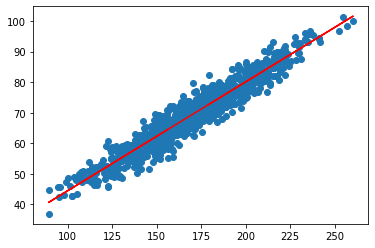

In [60]:
plt.scatter(height , weight)
plt.plot(height, y_hat, color='r')
plt.show()

#### Polyminal Regression

#### Regularization Techniques



##### A project 

#### Classification

### California House Price Predicting 


    SGDRegression -> Hyper Tune Model to improve accuracy 
    
        make a report on this

     Hyper Tune  

In [ ]:
print() # shift tab

In [ ]:
SGDRegressor()

    at epoch  will use complete dataset to update weights / thetas

    chapter no 3

    Batch Gradient Descent Algorithm  
    
    Mini Batch Gradient Descent Algorithm
    
    Stochastic Gradient Descent Algorithm

### Project optimize SGDRegressor